# Introduction

Asteroid collisions although a low probability event, pose a unique threat to the planet, with potentially catastrophic consequences. Unlike many natural disasters, the trajectories of asteroids are predictable, offering a window of opportunity for detection and response. Using technological advancements and data analysis, scientists aim to identify and characterise asteroids to enable early detection and mitigation. 

In [1]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
# extract data in pd dataframe
nasa = pd.read_csv(r"Data\nasa.csv")

In [3]:
# explore the size of the dataset

print(f"The data contains {nasa.shape[0]} records")
print(f"and {nasa.shape[1]} dimensions")

The data contains 4687 records
and 40 dimensions


In [4]:
# explore the field names and their datatype
nasa.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [5]:
# explore number of null values
nasa.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

# Full field descriptions

1. Neo Reference ID: An identification number assigned to the Near-Earth Object (NEO). It uniquely identifies each NEO in the database.

2. Name: A unique identifier assigned to the NEO. It could be an alphanumeric code or a designation given by astronomers.

3. Absolute Magnitude: A measure of the intrinsic brightness of the NEO. It indicates the NEO's size, with lower values representing larger and brighter objects.

4. Est Dia in KM(min): The minimum estimated diameter of the NEO in kilometers.

5. Est Dia in KM(max): The maximum estimated diameter of the NEO in kilometers. These two variables provide a range for the estimated size of the NEO.

6. Est Dia in M(min) and Est Dia in M(max): Similar to the above, but the estimated diameter in meters.

7. Est Dia in Miles(min) and Est Dia in Miles(max): Similar to the above, but the estimated diameter in miles.

8. Est Dia in Feet(min) and Est Dia in Feet(max): Similar to the above, but the estimated diameter in feet.

9. Close Approach Date: The date of the NEO's closest approach to Earth.

10. Epoch Date Close Approach: The date and time of the NEO's closest approach to Earth, represented as an epoch timestamp.

11. Relative Velocity km per sec: The relative velocity of the NEO with respect to Earth, measured in kilometers per second.

12. Relative Velocity km per hr: The relative velocity of the NEO with respect to Earth, measured in kilometers per hour.

13. Miles per hour: The relative velocity of the NEO with respect to Earth, measured in miles per hour.

14. Miss Dist.(Astronomical): The miss distance between the NEO and Earth, expressed in astronomical units (AU), where 1 AU is the average distance from Earth to the Sun.

15. Miss Dist.(lunar): The miss distance between the NEO and Earth, expressed in lunar distances (LD), where 1 LD is the average distance from Earth to the Moon.

16. Miss Dist.(kilometers): The miss distance between the NEO and Earth, expressed in kilometers.

17. Miss Dist.(miles): The miss distance between the NEO and Earth, expressed in miles.

18. Orbiting Body: The celestial body around which the NEO is orbiting. Typically, this would be Earth.

19. Orbit ID: An identification number assigned to the orbit of the NEO. It helps in uniquely identifying and tracking the orbit of the NEO.

20. Orbit Determination Date: The date on which the orbit of the NEO was determined.

21. Orbit Uncertainty: Indicates the uncertainty associated with the predicted orbit of the NEO.

22. Minimum Orbit Intersection: The minimum distance between the orbit of the NEO and Earth's orbit.

23. Jupiter Tisserand Invariant: A numerical value used to classify the type of orbit an NEO has relative to Jupiter's orbit.

24. Epoch Osculation: The reference date and time used for calculating the orbital parameters of the NEO.

25. Eccentricity: A measure of the shape of the NEO's orbit. It indicates how elongated or circular the orbit is.

26. Semi Major Axis: A fundamental parameter of the NEO's orbit. It defines the size of the orbit.

27. Inclination: The tilt of the NEO's orbit relative to the plane of reference.

28. Asc Node Longitude: The longitude of the ascending node of the NEO's orbit.

29. Orbital Period: The time taken by the NEO to complete one orbit around the Sun.

30. Perihelion Distance: The closest distance between the NEO and the Sun during its orbit.

31. Perihelion Arg: The argument of the perihelion, which is the angle between the ascending node and the perihelion measured in the plane of the orbit.

32. Aphelion Dist: The farthest distance between the NEO and the Sun during its orbit.

33. Perihelion Time: The time at which the NEO reaches its closest point to the Sun during its orbit.

34. Mean Anomaly: The angular distance of the NEO from its perihelion at a particular point in time.

35. Mean Motion: The average angular velocity of the NEO along its orbit.

36. Equinox: The reference equinox used for calculating the orbital elements of the NEO.

37. Hazardous: A binary variable indicating whether the NEO is classified as hazardous (True) or not (False) based on its size, orbit, and potential threat to Earth.

From the above descriptions you can see that there are a number of duplicated fields which contain unit conversions, these should be removed: 

- 'Est Dia in M(min)'
- 'Est Dia in M(max)'
- 'Est Dia in Miles(min)'
- 'Est Dia in Miles(max)'
- 'Est Dia in Feet(min)'
- 'Est Dia in Feet(max)'
- 'Relative Velocity km per hr'
- 'Miles per hour'
- 'Miss Dist.(Astronomical)'
- 'Miss Dist.(lunar)'
- 'Miss Dist.(Miles)'

There is also time information which can also be reomved

- 'Close Approach Date'
- 'Epoch Date Close Approach' 
- 'Orbit Determination Date'
- 'Perihelion Time'
- 'Epoch Osculation'

In [6]:
# Remove redundent fields 

nasa_reduced = nasa.copy()
nasa_reduced.drop(['Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(miles)', 'Orbit Determination Date', 
       'Epoch Osculation', 'Perihelion Time'], axis=1, inplace=True)

In [7]:
# Identifying the total number of unique items in each field

for col in nasa_reduced.columns:
    count = len(list((nasa[col]).unique()))
    print (f"The number of unique items in {col} is: {count}")

The number of unique items in Neo Reference ID is: 3692
The number of unique items in Name is: 3692
The number of unique items in Absolute Magnitude is: 269
The number of unique items in Est Dia in KM(min) is: 269
The number of unique items in Est Dia in KM(max) is: 269
The number of unique items in Relative Velocity km per sec is: 4687
The number of unique items in Miss Dist.(kilometers) is: 4661
The number of unique items in Orbiting Body is: 1
The number of unique items in Orbit ID is: 188
The number of unique items in Orbit Uncertainity is: 10
The number of unique items in Minimum Orbit Intersection is: 3678
The number of unique items in Jupiter Tisserand Invariant is: 2495
The number of unique items in Eccentricity is: 3692
The number of unique items in Semi Major Axis is: 3692
The number of unique items in Inclination is: 3692
The number of unique items in Asc Node Longitude is: 3692
The number of unique items in Orbital Period is: 3692
The number of unique items in Perihelion Di

From the above analysis you can see that both Orbiting body and also Equinnox can be removed containing only 1 unique value.

Also there are truely only 3692 uniques records as shown by the number of unique recoords in the Neo Reference and Name fields.

In [8]:
# Remove duplicate records

nasa_reduced = nasa_reduced.drop_duplicates(subset=['Name','Neo Reference ID'])

In [9]:
# Remove redundent fields 

nasa_reduced = nasa_reduced.copy()
nasa_reduced.drop(['Name','Neo Reference ID','Equinox' ,'Orbit ID','Orbiting Body'], axis=1, inplace=True)

In [10]:
nasa_reduced.shape

(3692, 19)

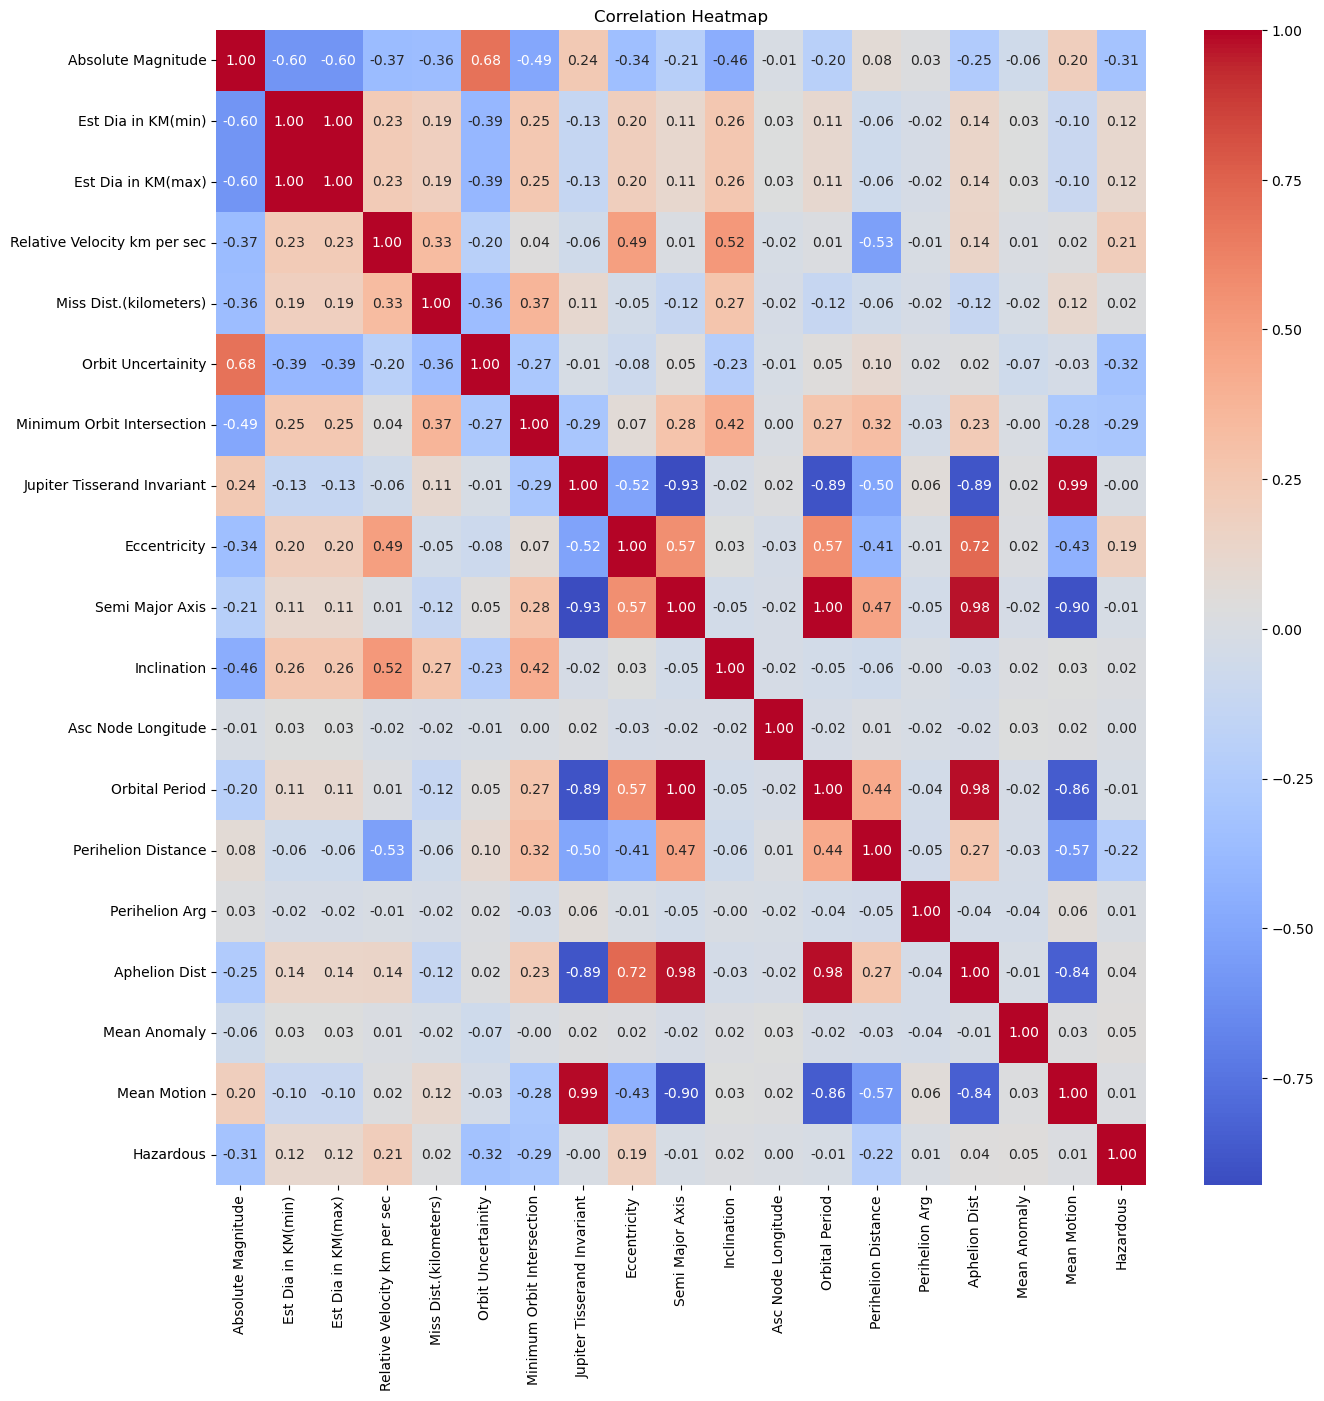

In [11]:
# Create a heatmap
plt.figure(figsize=(15, 15)) 
sns.heatmap(nasa_reduced.corr(), annot=True, cmap='coolwarm', fmt=".2f")  
plt.title('Correlation Heatmap')  
plt.show()

In [12]:
nasa_reduced.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Relative Velocity km per sec', 'Miss Dist.(kilometers)',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Eccentricity', 'Semi Major Axis',
       'Inclination', 'Asc Node Longitude', 'Orbital Period',
       'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist',
       'Mean Anomaly', 'Mean Motion', 'Hazardous'],
      dtype='object')

In [13]:
# Remove possible related fields 

nasa_reduced2 = nasa_reduced.copy()
nasa_reduced2.drop(['Jupiter Tisserand Invariant','Semi Major Axis','Aphelion Dist','Mean Motion'], axis=1, inplace=True)

In [14]:
nasa_reduced2['Est Dia in KM(AVG)'] = (nasa_reduced2['Est Dia in KM(max)'] + nasa_reduced2['Est Dia in KM(min)'] )/2

nasa_cleaned = nasa_reduced2.copy()
nasa_cleaned.drop(['Est Dia in KM(max)','Est Dia in KM(min)'], axis=1, inplace=True)

In [15]:
nasa_cleaned.head(10)

,Absolute Magnitude,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Mean Anomaly,Hazardous,Est Dia in KM(AVG)
0,21.6,6.115834,62753692.0,5,0.025282,0.425549,6.025981,314.373913,609.599786,0.808259,57.257470,264.837533,True,0.205846
1,21.3,18.113985,57298148.0,3,0.186935,0.351674,28.412996,136.717242,425.869294,0.718200,313.091975,173.741112,False,0.236343
2,20.3,7.590711,7622911.5,0,0.043058,0.348248,4.237961,259.475979,643.580228,0.950791,248.415038,292.893654,True,0.374578
3,27.4,11.173874,42683616.0,6,0.005512,0.216578,7.905894,57.173266,514.082140,0.983902,18.707701,68.741007,False,0.014241
4,21.6,9.840831,61010824.0,1,0.034798,0.210448,16.793382,84.629307,495.597821,0.967687,158.263596,135.142133,True,0.205846
5,19.6,10.808844,58759768.0,1,0.272213,0.563441,17.927751,178.971951,556.160556,0.577800,198.145969,354.237368,False,0.517062
6,19.6,10.808842,58759532.0,1,0.272213,0.563441,17.927748,178.971953,556.160544,0.577800,198.145960,354.237396,False,0.517062
7,19.2,24.421884,19324928.0,0,0.098758,0.449763,34.695127,112.562984,502.808758,0.680905,288.374651,186.776932,False,0.621645
8,17.8,17.373784,53598364.0,0,0.109354,0.238179,22.215210,80.211132,447.837013,0.872705,353.422394,182.236432,False,1.184521
9,21.5,12.899610,22709816.0,0,0.016907,0.551389,2.059577,2.613682,299.535161,0.393040,253.765937,119.861382,True,0.215547


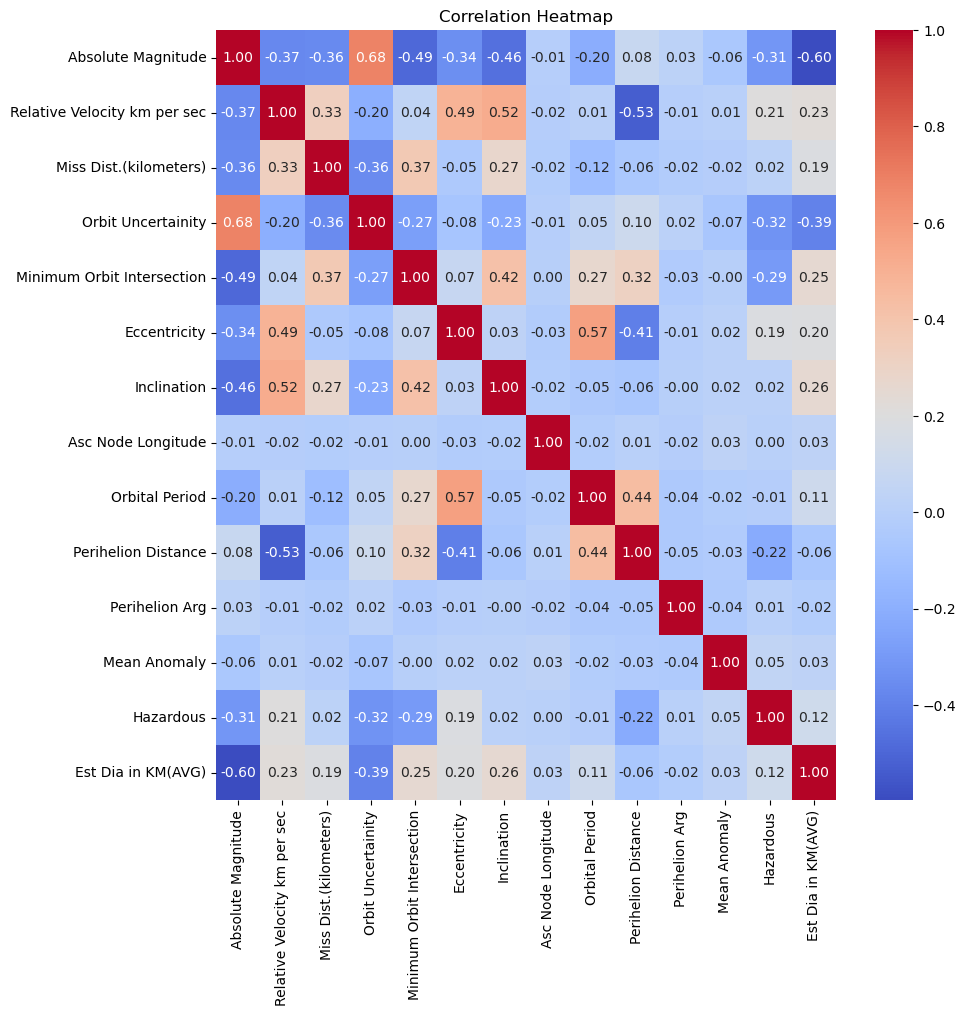

In [16]:
# Create a heatmap
plt.figure(figsize=(10, 10)) 
sns.heatmap(nasa_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")  
plt.title('Correlation Heatmap')  
plt.show()

# Out of the Box modelling

In [18]:
# Encode the Hazardous field (true = 1) (False = 0)

nasa_cleaned['Hazardous'] = nasa_cleaned['Hazardous'].replace(True, 1)
nasa_cleaned['Hazardous'] = nasa_cleaned['Hazardous'].replace(False, 0)